In [24]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
df = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv')

#### General Information

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Remove unused column first before continue

In [29]:
df.drop(columns=['id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Gender Analysis

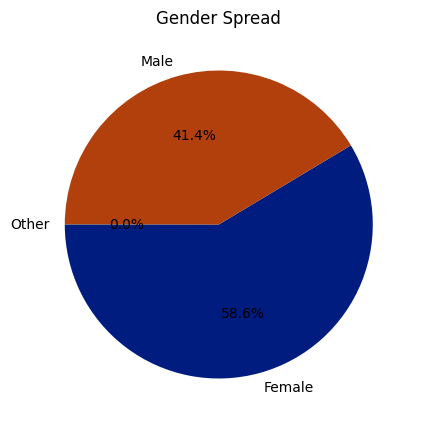

In [30]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('dark'))
plt.title("Gender Spread")
plt.show()

/var/folders/4_/pxdtsfd5053_tx66vpzt38j40000gn/T/ipykernel_80433/1687151060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_with_stroke.index, y=gender_with_stroke.values, palette="pastel")


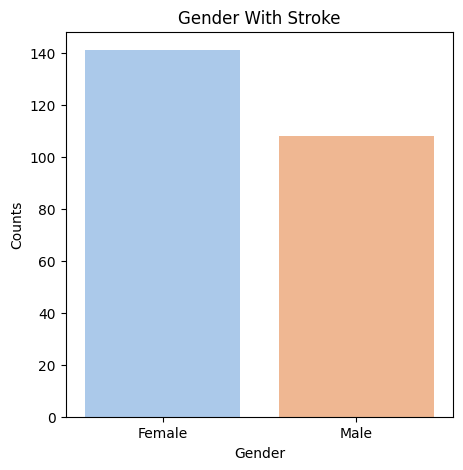

In [31]:
df_stroke_yes = df[df['stroke'] == 1]
gender_with_stroke = df_stroke_yes['gender'].value_counts()

plt.figure(figsize=(5,5))
sns.barplot(x=gender_with_stroke.index, y=gender_with_stroke.values, palette="pastel")
plt.title("Gender With Stroke")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.show()

#### Age Analysis

In [32]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

[]

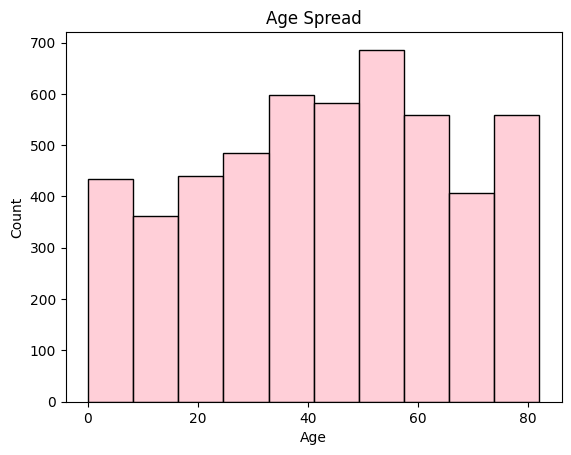

In [33]:
sns.histplot(df['age'], bins=10, kde=False, color='pink')

plt.ylabel("Count")
plt.xlabel('Age')
plt.title("Age Spread")
plt.plot()

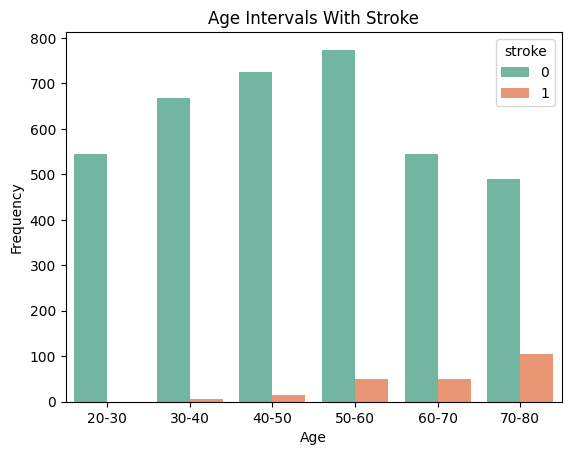

In [34]:
# plt.figure(figsize=(10, 5))
# sns.scatterplot(x='age', y='stroke', data=df)
# plt.show()

df['age_group'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

sns.countplot(x='age_group', hue='stroke', data=df, palette='Set2')

plt.title("Age Intervals With Stroke")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Hypertension Analysis

In [35]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

/var/folders/4_/pxdtsfd5053_tx66vpzt38j40000gn/T/ipykernel_80433/3919588658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hypertension_count.index, y=hypertension_count.values, palette='pastel')


[]

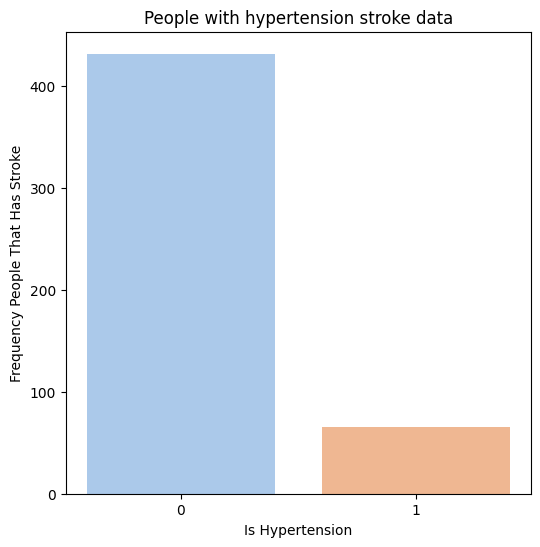

In [36]:
df_hypertension_yes = df[df['hypertension'] == 1]
hypertension_count = df_hypertension_yes['stroke'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x=hypertension_count.index, y=hypertension_count.values, palette='pastel')
plt.title("People with hypertension stroke data")
plt.xlabel("Is Hypertension")
plt.ylabel("Frequency People That Has Stroke")
plt.plot()

#### Heart Disease Analysis

In [37]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

/var/folders/4_/pxdtsfd5053_tx66vpzt38j40000gn/T/ipykernel_80433/2266750850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_count.index, y=stroke_count.values, palette='pastel')


[]

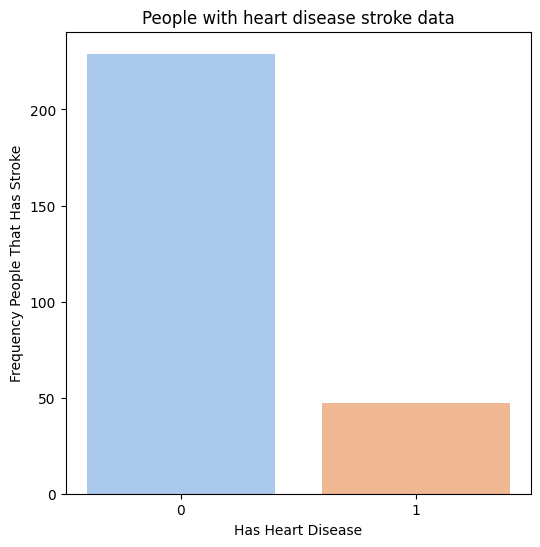

In [38]:
df_heart_disease_yes = df[df['heart_disease'] == 1]
stroke_count = df_heart_disease_yes['stroke'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x=stroke_count.index, y=stroke_count.values, palette='pastel')
plt.title("People with heart disease stroke data")
plt.xlabel("Has Heart Disease")
plt.ylabel("Frequency People That Has Stroke")
plt.plot()

#### Relationship Analysis

In [39]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [40]:
married_mapping = {'Yes': 1, 'No': 0}
df['ever_married'] = df['ever_married'].map(married_mapping)

In [41]:
df_married = df[df['ever_married'] == 1]
df_not_married = df[df['ever_married'] == 0]

[]

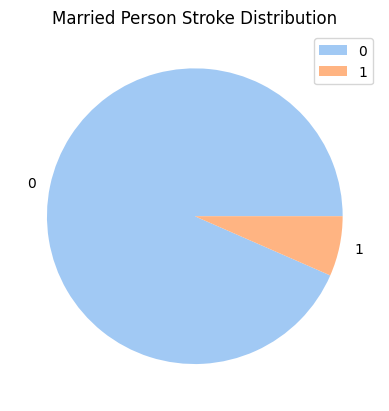

In [42]:
married_stroke_count = df_married['stroke'].value_counts()
plt.pie(married_stroke_count.values, labels=married_stroke_count.index, colors=sns.color_palette('pastel'))
plt.title('Married Person Stroke Distribution')
plt.legend()
plt.plot()

[]

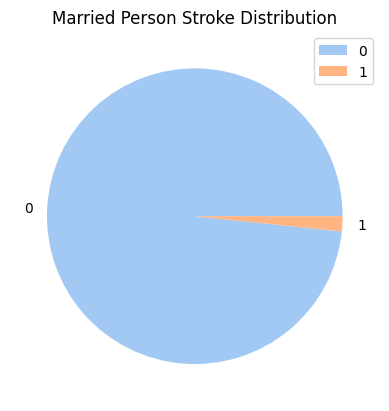

In [43]:
df_not_married['stroke'].value_counts()
married_stroke_count = df_not_married['stroke'].value_counts()
plt.pie(married_stroke_count.values, labels=married_stroke_count.index, colors=sns.color_palette('pastel'))
plt.title('Married Person Stroke Distribution')
plt.legend()
plt.plot()

#### Work Type


[]

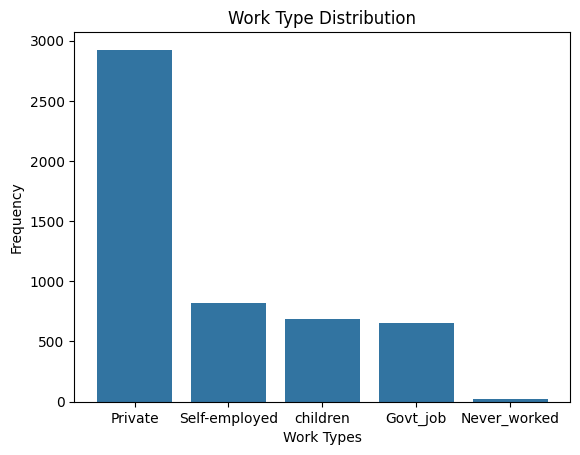

In [44]:
work_type_count = df['work_type'].value_counts()
sns.barplot(x=work_type_count.index, y=work_type_count.values)
plt.title("Work Type Distribution")
plt.xlabel("Work Types")
plt.ylabel("Frequency")
plt.plot()

[]

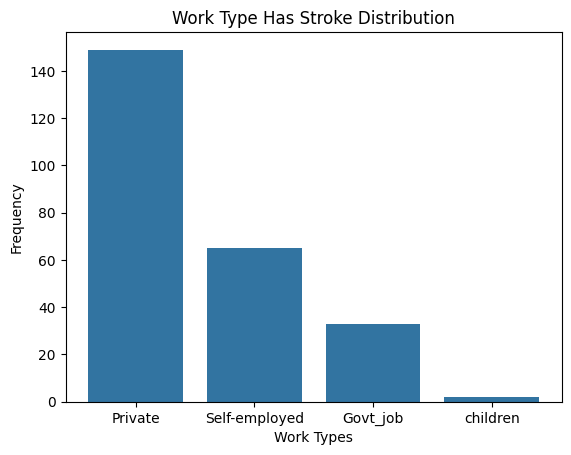

In [47]:
work_type_has_stroke = df_stroke_yes['work_type'].value_counts()
sns.barplot(x=work_type_has_stroke.index, y=work_type_has_stroke.values)
plt.title("Work Type Has Stroke Distribution")
plt.xlabel("Work Types")
plt.ylabel("Frequency")
plt.plot()

#### Residence Type Analysis

In [49]:
df['Residence_type'].head()

0    Urban
1    Rural
2    Rural
3    Urban
4    Rural
Name: Residence_type, dtype: object

In [51]:
df['Residence_type'].describe()

count      5110
unique        2
top       Urban
freq       2596
Name: Residence_type, dtype: object

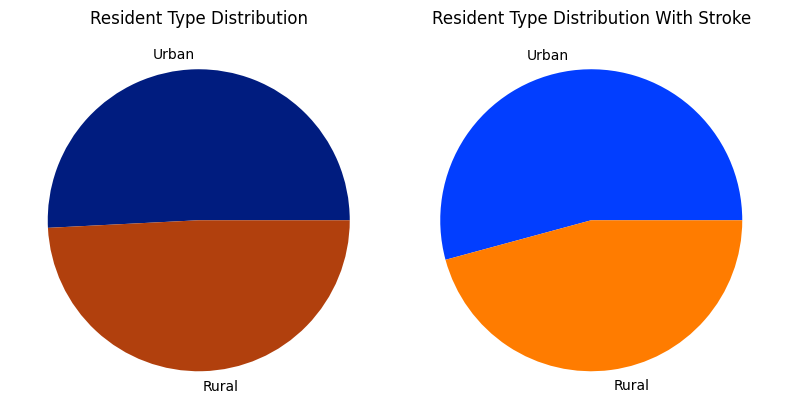

In [65]:
resident_count = df['Residence_type'].value_counts()
resident_count_with_stroke= df_stroke_yes['Residence_type'].value_counts()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.pie(x=resident_count, labels=resident_count.index, colors=sns.color_palette('dark'))
ax1.set_title("Resident Type Distribution")

ax2.pie(x=resident_count_with_stroke, labels=resident_count_with_stroke.index, colors=sns.color_palette("bright"))
ax2.set_title("Resident Type Distribution With Stroke")

plt.tight_layout()
plt.show()

#### Glucose Level

In [68]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [69]:
df_stroke_yes['avg_glucose_level'].describe()

count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: avg_glucose_level, dtype: float64

#### BMI

In [70]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [71]:
df_stroke_yes['bmi'].describe()

count    209.000000
mean      30.471292
std        6.329452
min       16.900000
25%       26.400000
50%       29.700000
75%       33.700000
max       56.600000
Name: bmi, dtype: float64

#### Smoking Analysis

In [72]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [73]:
df_stroke_yes['smoking_status'].value_counts()

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

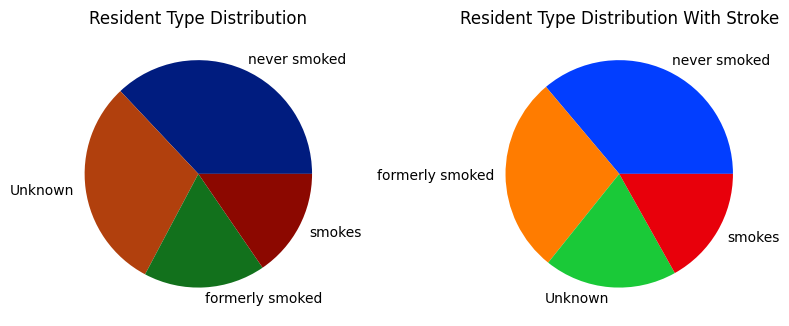

In [74]:
resident_count = df['smoking_status'].value_counts()
resident_count_with_stroke= df_stroke_yes['smoking_status'].value_counts()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.pie(x=resident_count, labels=resident_count.index, colors=sns.color_palette('dark'))
ax1.set_title("Resident Type Distribution")

ax2.pie(x=resident_count_with_stroke, labels=resident_count_with_stroke.index, colors=sns.color_palette("bright"))
ax2.set_title("Resident Type Distribution With Stroke")

plt.tight_layout()
plt.show()